In [16]:
import pandas as pd
import numpy as np
import wrangle
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
# plotting defaults
plt.rc('figure', figsize=(11, 5))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [17]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

In [18]:

def split_data(df):
    """This function will input dataframe, convert year to datetime format and split into train,validate and test"""
    #convert year into datetime format
    df.year = pd.to_datetime(df.year, format = '%Y')
    # set datetime as index
    df = df.set_index("year").sort_index()
    train = df.loc[:"2016"]
    validate = df.loc["2017":"2019"]
    test = df.loc["2020":"2022"]
    return train,validate,test

In [4]:
df = wrangle.bee_merged()

In [5]:
train,validate,test = split_data(df)

In [6]:
train.shape,validate.shape,test.shape

((240, 15), (128, 15), (118, 15))

In [ ]:
'''
plt.figure(figsize=(16, 10))
df.colonies_lost.groupby([df.index.year, df.index.month]).sum().unstack(0).plot(figsize = (14,10))
plt.title('Annual Weekly Sales by Month', fontsize = 16)
plt.ticklabel_format(style='plain', axis='y')
plt.show()
'''

In [7]:
#concat last row of train with first of validate
#they should only be a month apart
pd.concat([train.tail(1), validate.head(1)])

,state,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,colonies_net_gain,beekeeper_colony_ratio,ansi,latitude,longitude
year,,,,,,,,,,,,,,,
2016-01-01,oregon,annual,120,60.299723,42.499091,6262,6961,4583,100.0,100.0,-1679,38.191667,41,44.572021,-122.070938
2017-01-01,west_virginia,annual,49,27.686916,32.746409,501,237,619,100.0,100.0,118,12.632653,54,38.491226,-80.954453


In [8]:
#concat last row of validate with first of test
#they should only be a month apart
pd.concat([validate.tail(1), test.head(1)])

,state,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,colonies_net_gain,beekeeper_colony_ratio,ansi,latitude,longitude
year,,,,,,,,,,,,,,,
2019-01-01,rhode_island,annual,13,32.812500,27.891275,30,21,43,100.0,100.0,13,3.307692,44,41.680893,-71.511780
2020-01-01,iowa,annual,34,70.322581,47.561659,166,545,230,100.0,100.0,64,6.764706,19,42.011539,-93.210526


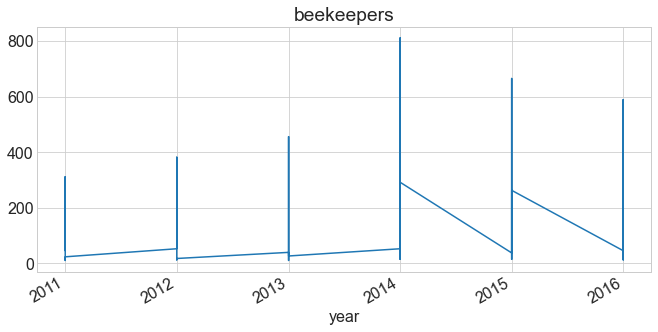

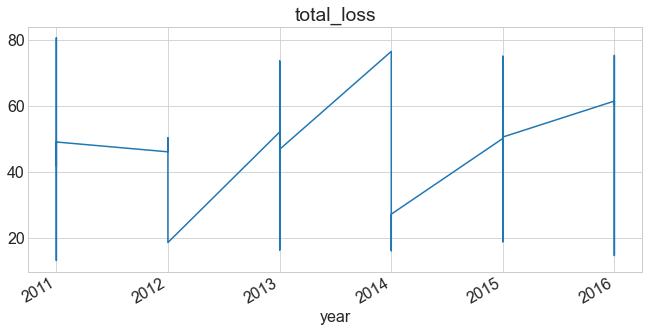

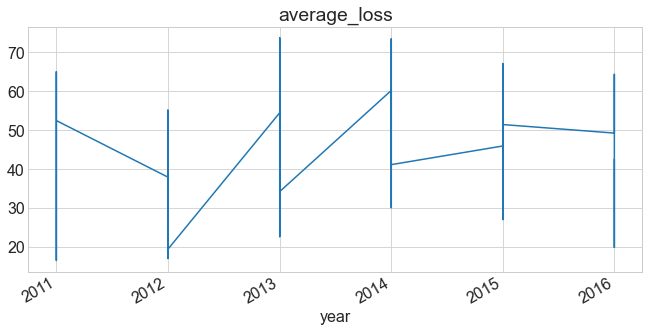

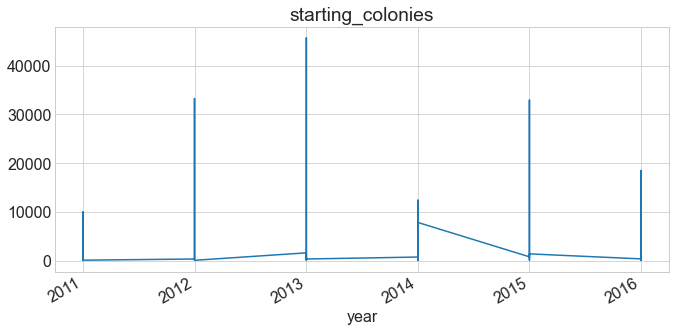

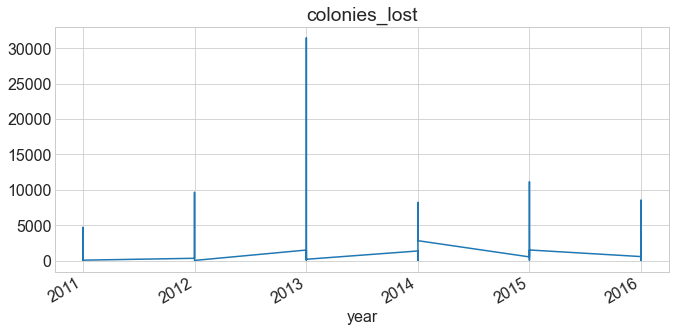

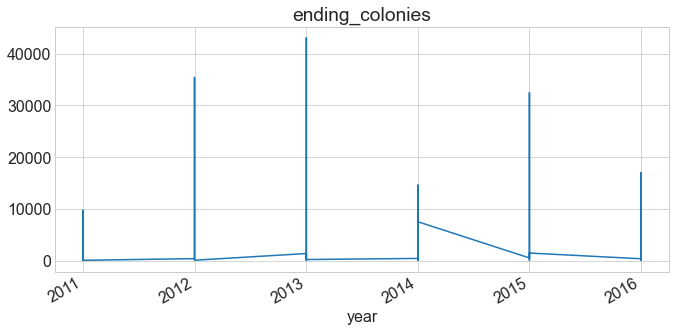

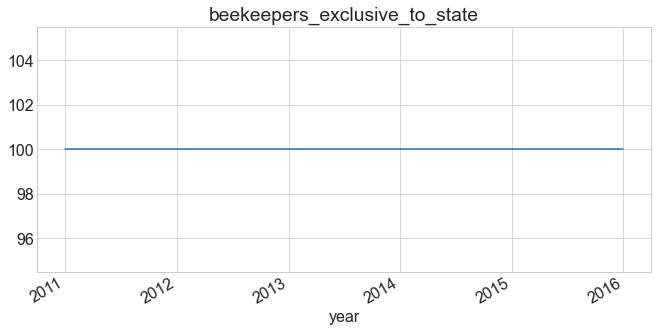

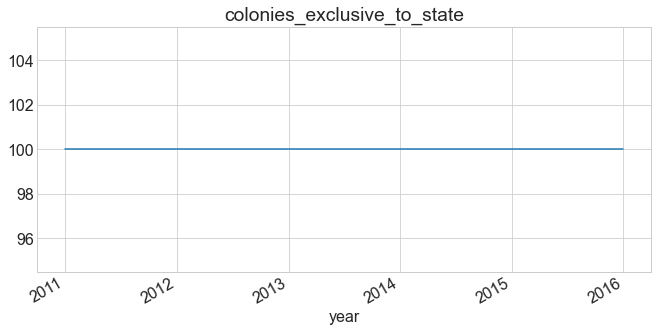

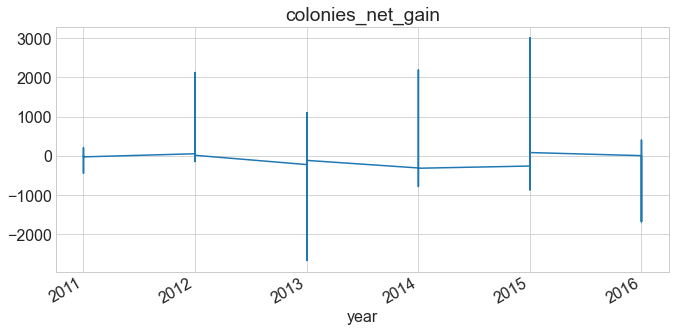

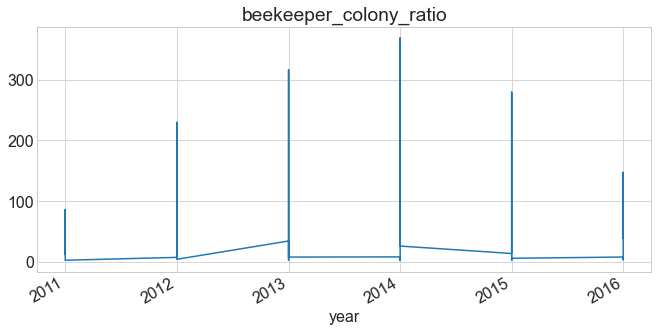

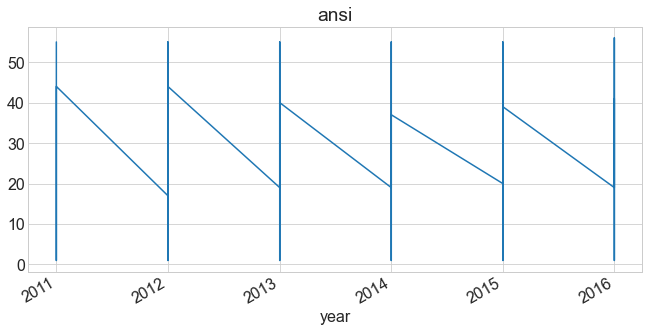

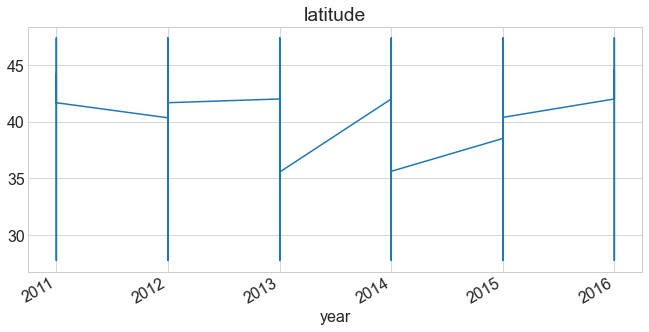

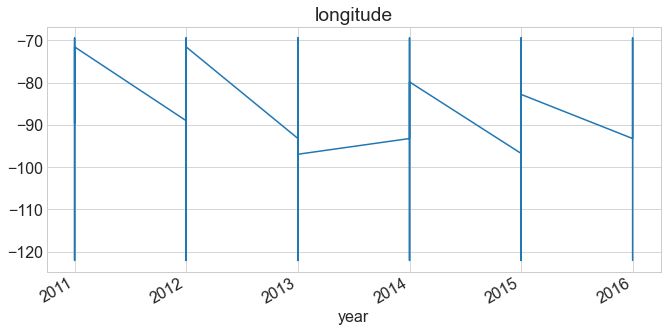

In [22]:
for col in train.drop(columns = ["state","season"]):
    train[col].plot()
    plt.title(col)
    plt.show()

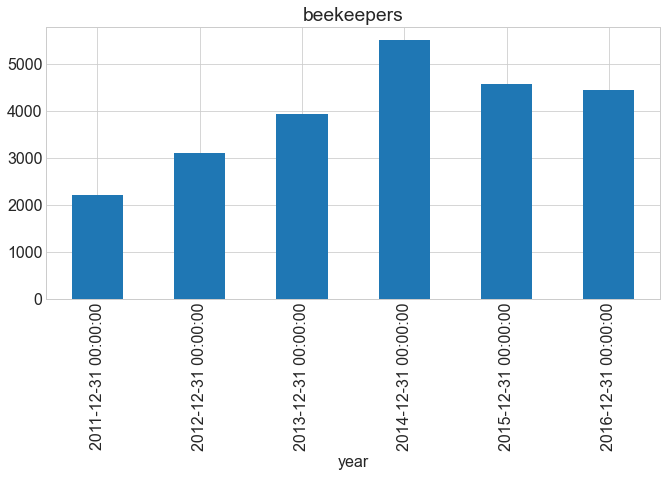

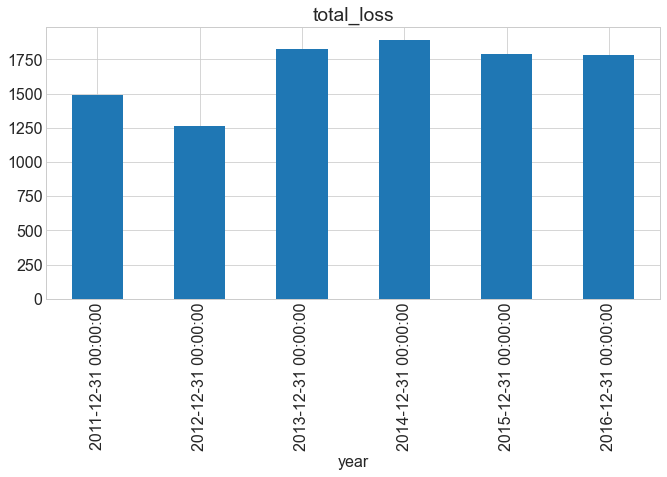

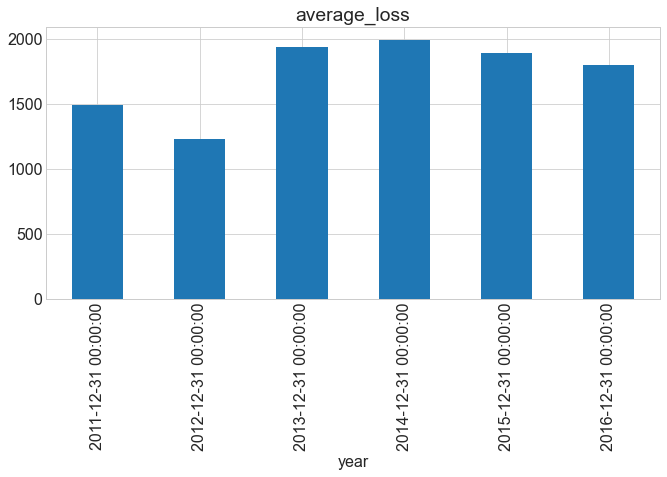

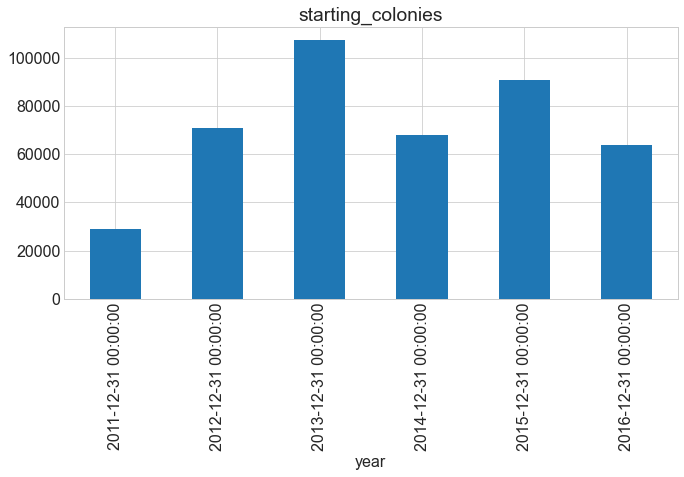

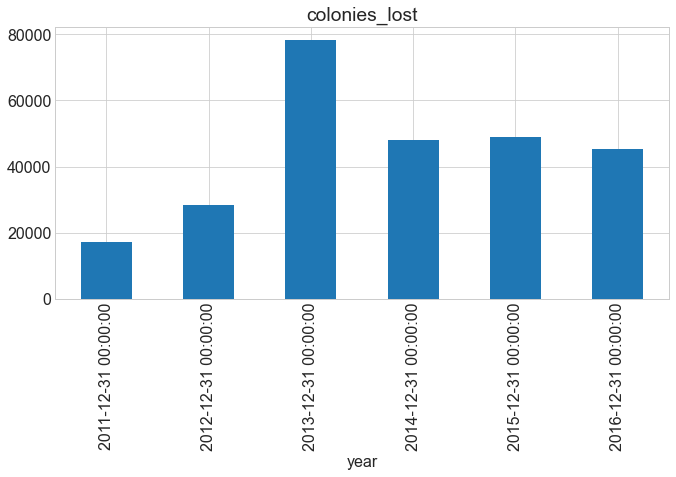

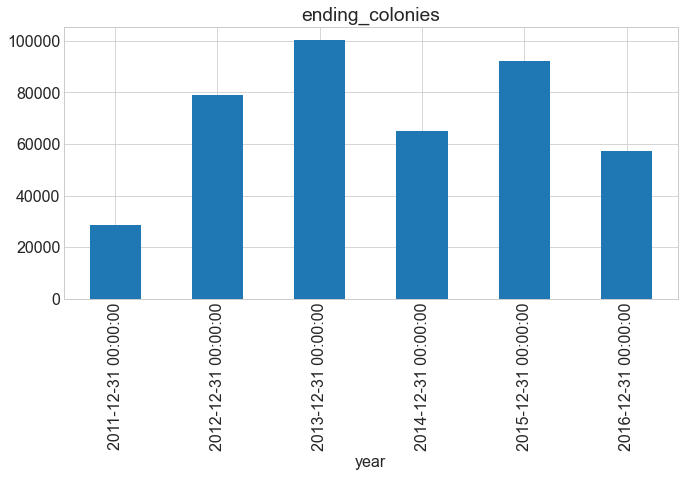

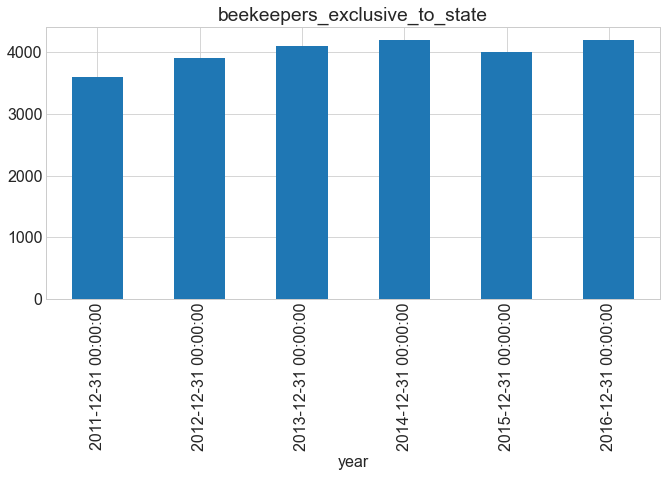

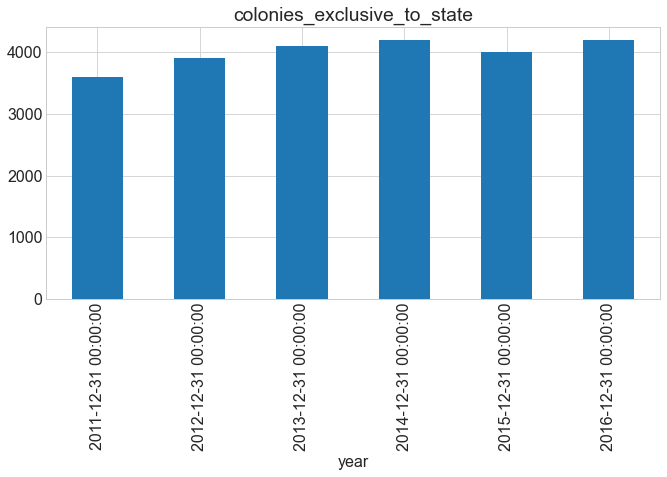

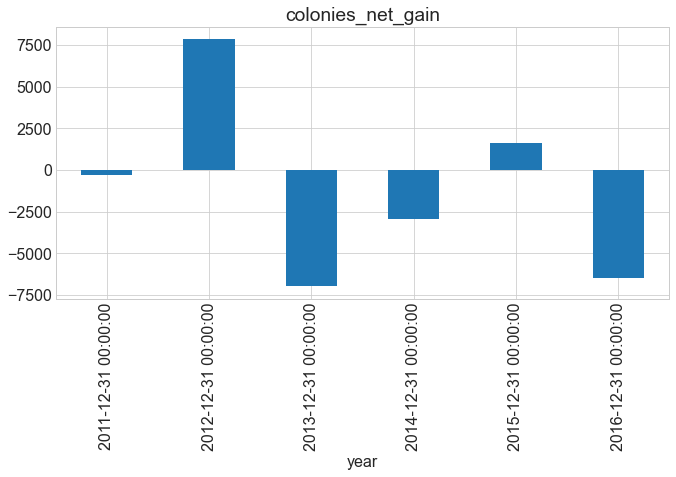

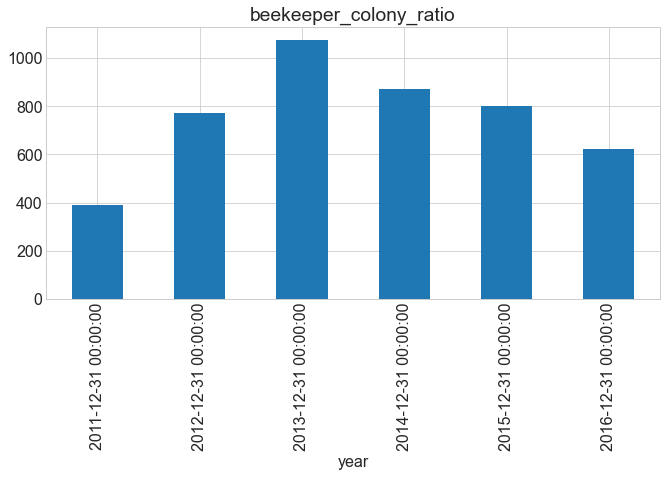

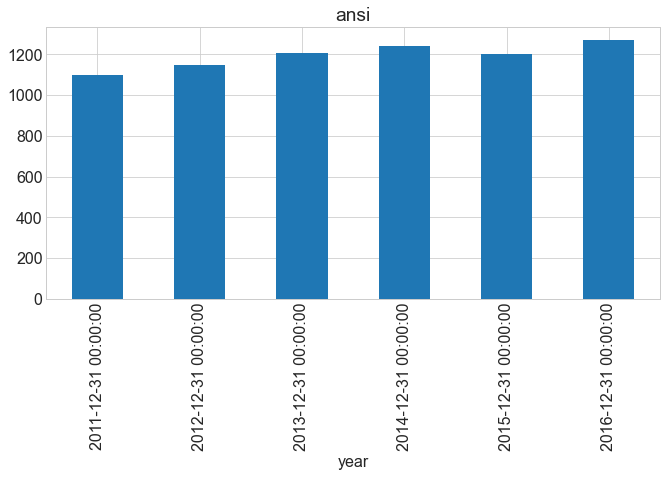

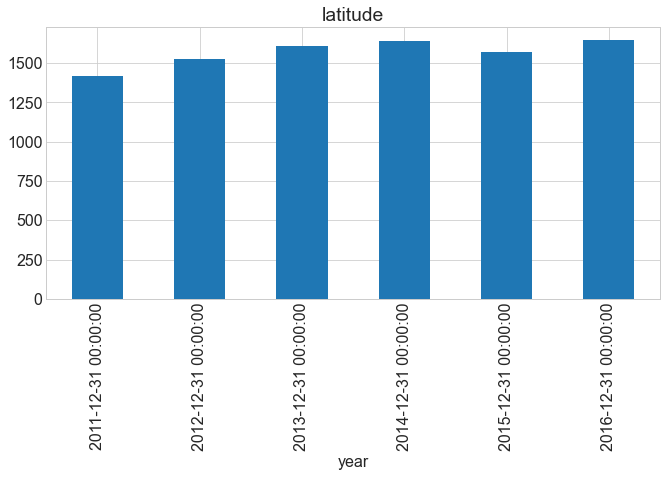

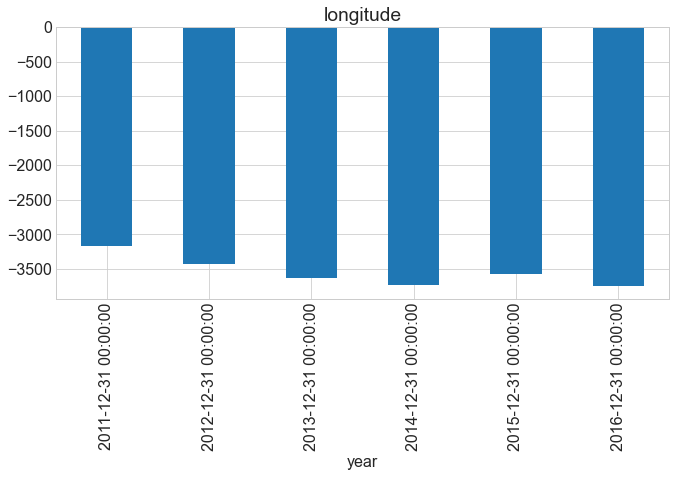

In [12]:
for col in train.drop(columns = ["state","season"]):
    train[col].resample("Y").sum().plot.bar()
    plt.title(col)
    plt.show()

In [16]:
train.head(2)

,state,season,beekeepers,total_loss,average_loss,starting_colonies,colonies_lost,ending_colonies,beekeepers_exclusive_to_state,colonies_exclusive_to_state,colonies_net_gain,beekeeper_colony_ratio,ansi,latitude,longitude
year,,,,,,,,,,,,,,,
2011-01-01,wisconsin,annual,46,41.837838,52.742064,529,387,538,100.0,100.0,9,11.695652,55,44.268543,-89.616508
2011-01-01,massachusetts,annual,73,61.063830,58.557295,252,287,183,100.0,100.0,-69,2.506849,25,42.230171,-71.530106


In [33]:
for col in train.drop(columns = ["state","season"]):
    train.groupby("state").sum().col.plot.bar()
    plt.show()

SyntaxError: invalid syntax (165396186.py, line 2)

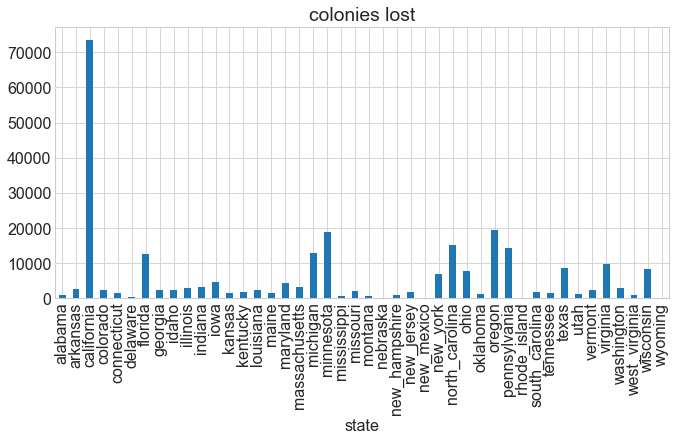

In [49]:
train.groupby("state").sum().colonies_lost.plot.bar()
plt.title("colonies lost")
plt.show()

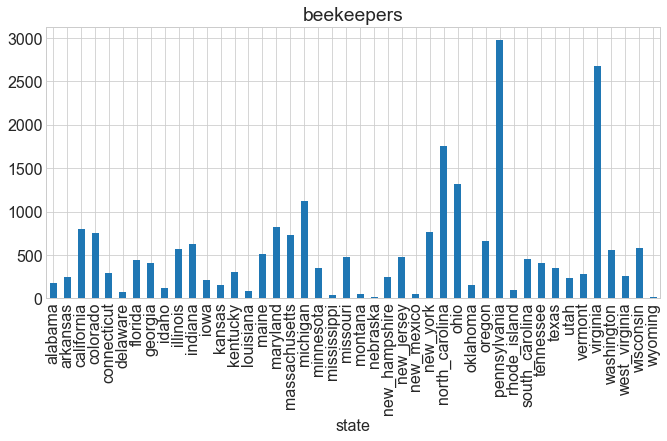

In [50]:
train.groupby("state").sum().beekeepers.plot.bar()
plt.title("beekeepers")
plt.show()

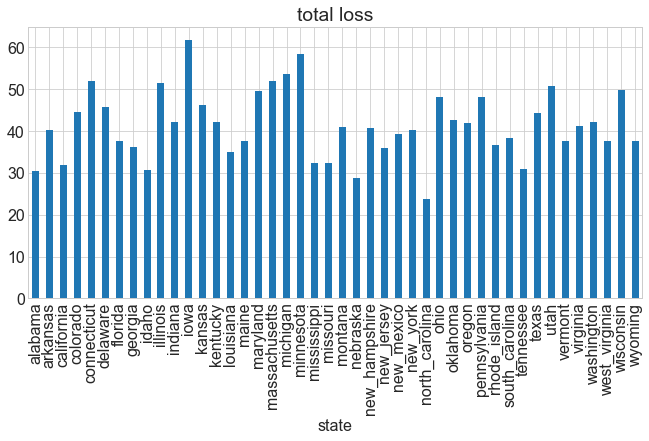

In [51]:
train.groupby("state").mean().total_loss.plot.bar()
plt.title("total loss")
plt.show()

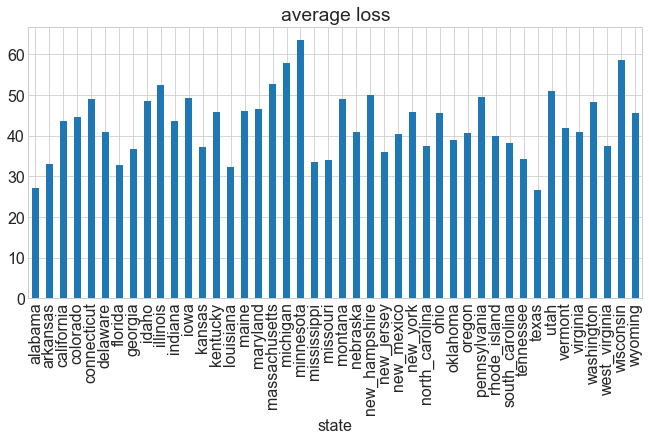

In [52]:
train.groupby("state").mean().average_loss.plot.bar()
plt.title("average loss")
plt.show()

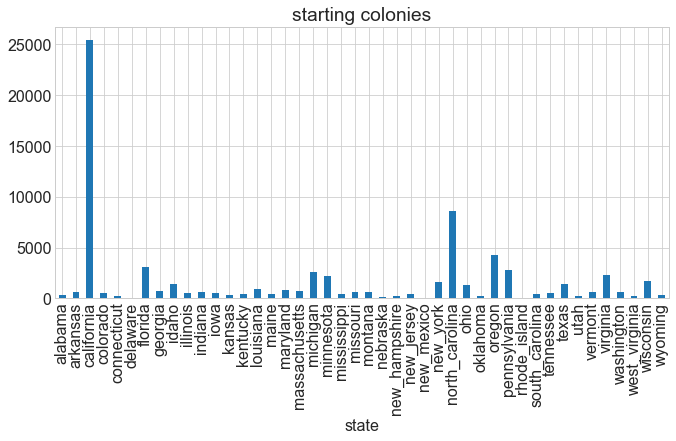

In [53]:
train.groupby("state").mean().starting_colonies.plot.bar()
plt.title("starting colonies")
plt.show()

<AxesSubplot:xlabel='state'>

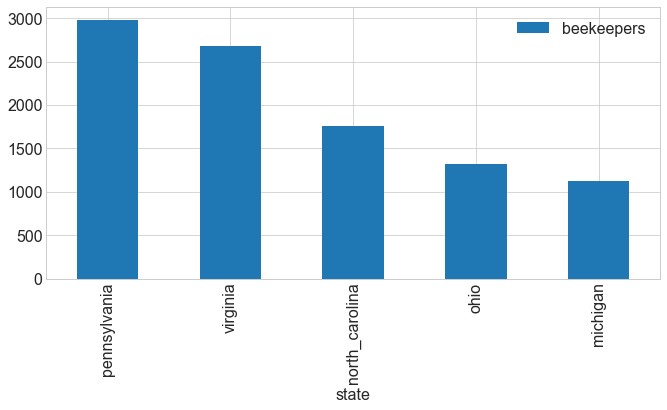

In [63]:
train.groupby("state")[["beekeepers"]].sum().sort_values(by = "beekeepers",ascending = False).head(5).plot.bar()

<AxesSubplot:xlabel='state'>

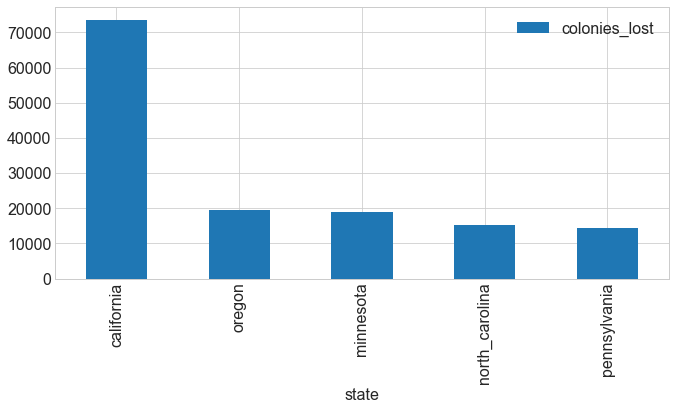

In [67]:
train.groupby("state")[["colonies_lost"]].sum().sort_values(by ="colonies_lost",ascending = False).head(5).plot.bar()

<AxesSubplot:xlabel='state'>

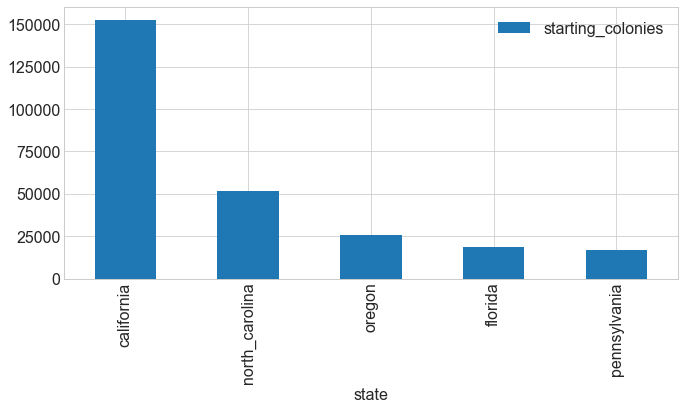

In [70]:
train.groupby("state")[["starting_colonies"]].sum().sort_values(by ="starting_colonies",ascending = False).head(5).plot.bar()

In [66]:
train.columns

Index(['state', 'season', 'beekeepers', 'total_loss', 'average_loss',
       'starting_colonies', 'colonies_lost', 'ending_colonies',
       'beekeepers_exclusive_to_state', 'colonies_exclusive_to_state',
       'colonies_net_gain', 'beekeeper_colony_ratio', 'ansi', 'latitude',
       'longitude'],
      dtype='object')

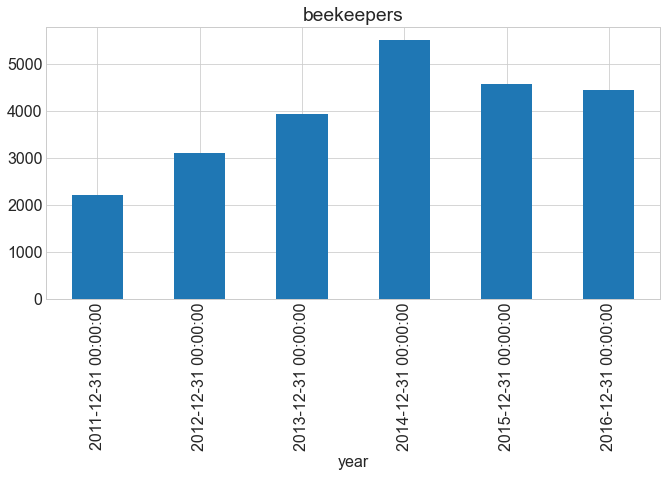

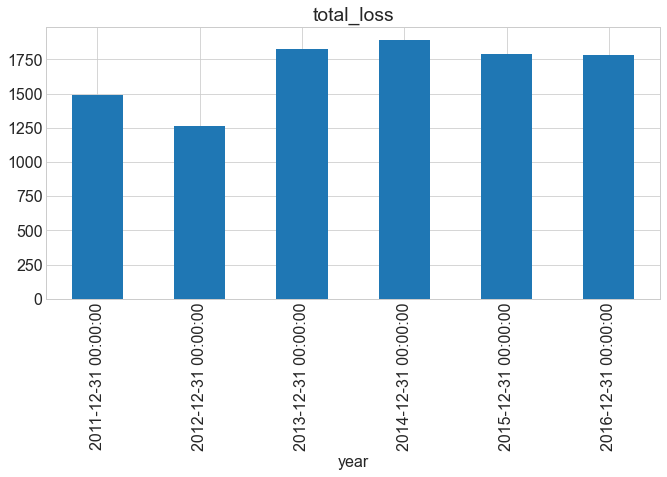

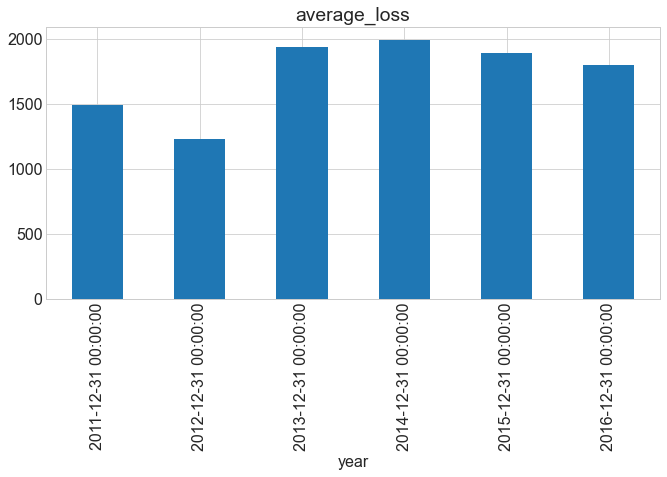

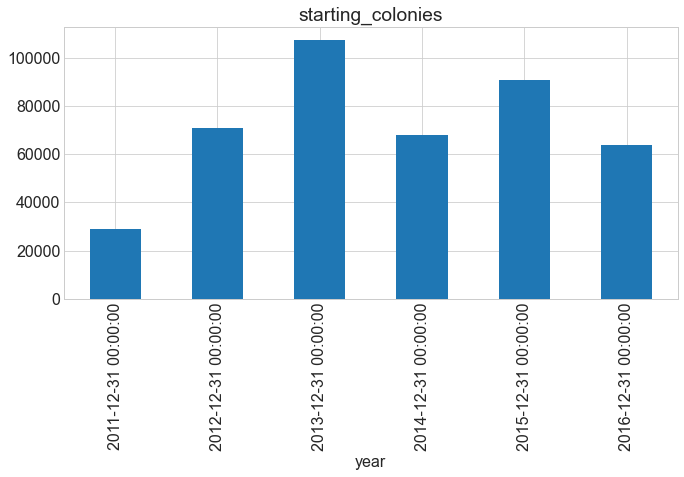

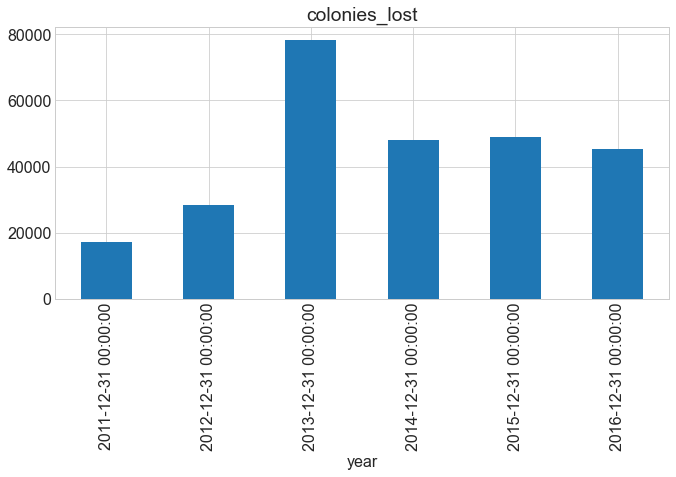

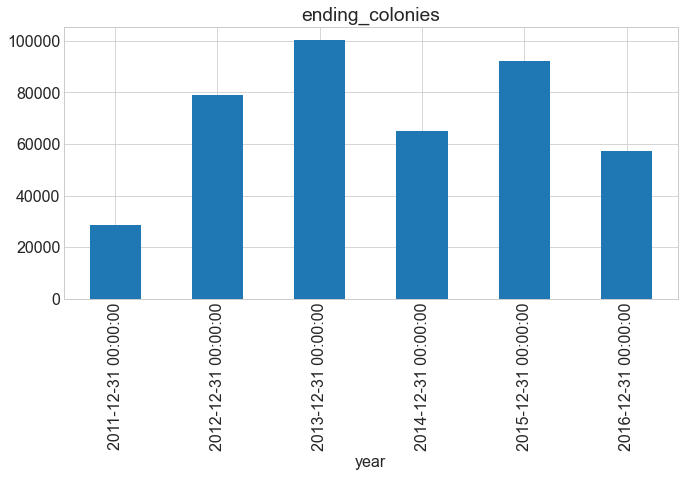

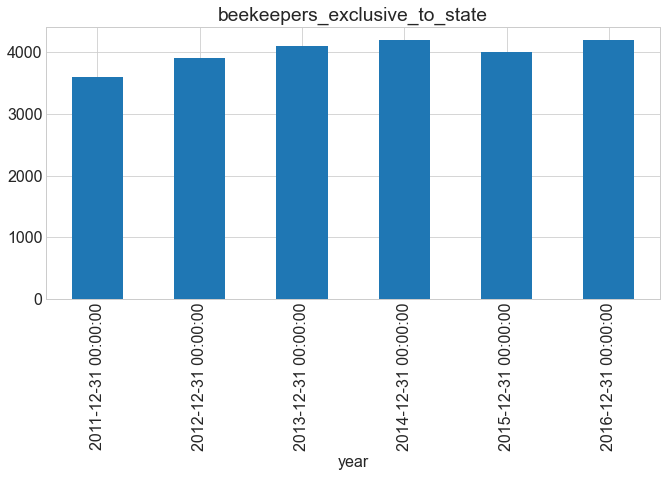

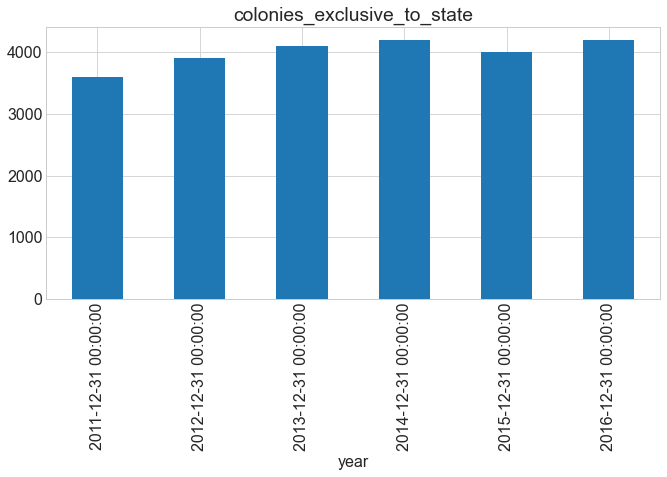

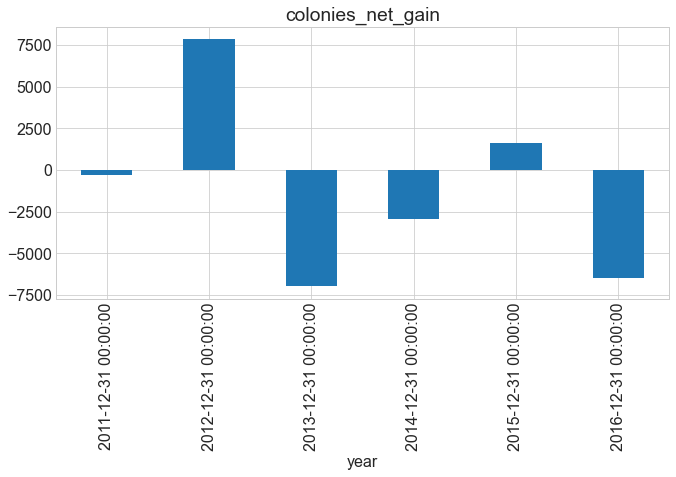

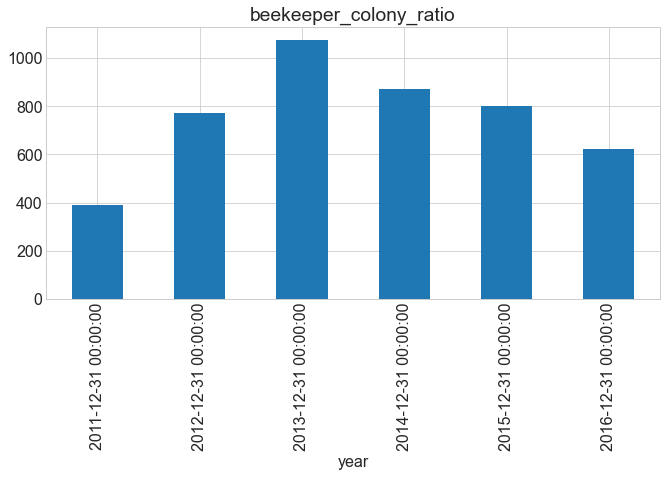

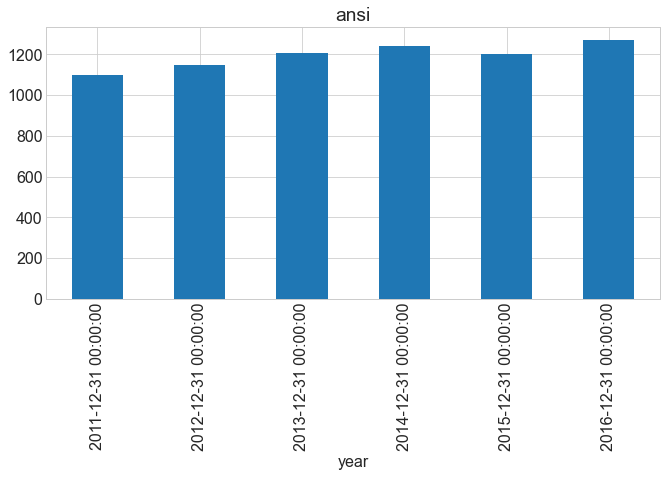

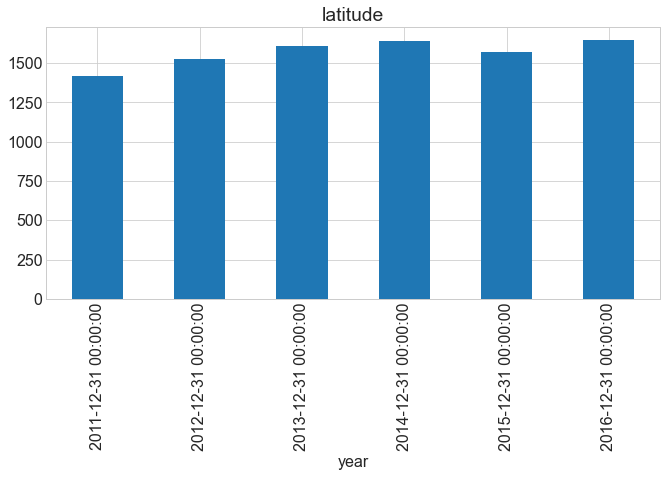

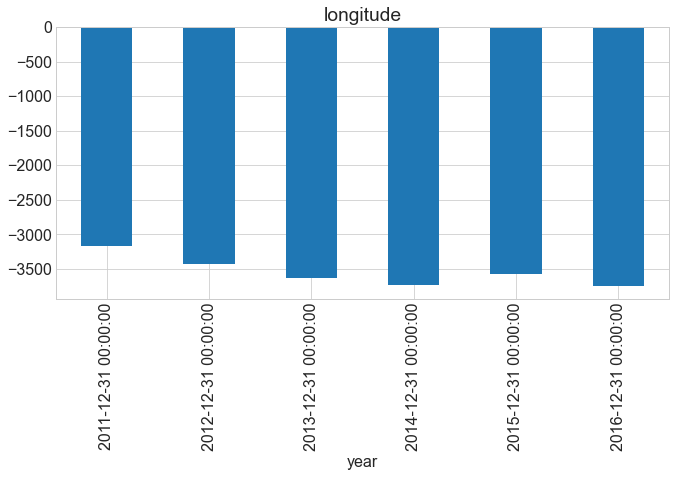

In [48]:
for col in train[train.state=="california"].drop(columns = ["state","season"]):
    train[col].resample("Y").sum().plot.bar()
    plt.title(col)
    plt.show()